<a href="https://colab.research.google.com/github/melozyj/Samples/blob/master/Yujie_Zhang_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Yujie Zhang Sample

### In this project, I want to analyze if the national Blood-Alcohol Content (BAC) policy limit of 0.08% effective with 10 years of data (2011-2020).

## Read the data prepared and the data from previous projects

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.api import OLS
from statsmodels.formula.api import ols
import dateutil
import os
import sys

In [ ]:
df = pd.read_csv('C:/Users/melox/Downloads/step2.csv')
df = pd.DataFrame(df)
df.columns

Index(['VE_FORMS_acc', 'PVH_INVL', 'PEDS', 'PERNOTMVIT', 'PERMVIT', 'PERSONS',
       'COUNTY_acc', 'DAY_acc', 'MONTH_acc', 'YEAR', 'DAY_WEEK', 'HOUR_acc',
       'MINUTE_acc', 'NHS', 'HARM_EV_acc', 'MAN_COLL_acc', 'RELJCT1',
       'RELJCT2', 'TYP_INT', 'REL_ROAD', 'WRK_ZONE', 'LGT_COND', 'WEATHER',
       'SCH_BUS_acc', 'RAIL', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR', 'ARR_MIN',
       'HOSP_HR', 'HOSP_MN', 'FATALS', 'DRUNK_DR', 'ID', 'STATE', 'ST_CASE',
       'VE_FORMS_per', 'VEH_NO', 'PER_NO', 'STR_VEH', 'COUNTY_per', 'DAY_per',
       'MONTH_per', 'HOUR_per', 'MINUTE_per', 'HARM_EV_per', 'MAN_COLL_per',
       'SCH_BUS_per', 'AGE', 'SEX', 'PER_TYP', 'INJ_SEV', 'SEAT_POS',
       'REST_USE', 'REST_MIS', 'AIR_BAG', 'EJECTION', 'EJ_PATH', 'EXTRICAT',
       'DRINKING', 'ALC_DET', 'ALC_STATUS', 'ATST_TYP', 'ALC_RES', 'DRUGS',
       'DRUG_DET', 'DSTATUS', 'HOSPITAL', 'DOA', 'DEATH_DA', 'DEATH_MO',
       'DEATH_YR', 'DEATH_HR', 'DEATH_MN', 'DEATH_TM', 'LAG_HRS', 'LAG_MINS',
       'WORK_IN

In [ ]:
# A quick of some key variables for this data set (490389 rows × 14 columns)
df[['YEAR', 'ID', 'State_abbreviation', 'PER_TYP', 'FATALS', 'DRUNK_DR', 
    'ALC_RES', 'Population', 'Average_Tax', 'AGE', 'SEX', 'DAY_acc','MONTH_acc', 'HOUR_acc', 'BAC']]

,YEAR,ID,State_abbreviation,PER_TYP,FATALS,DRUNK_DR,ALC_RES,Population,Average_Tax,AGE,SEX,DAY_acc,MONTH_acc,HOUR_acc,BAC
0,2011,2011_10001,AL,1.0,1,1,20,4799069.0,0.916667,55,2,4,1,16,BAC<=0.02
1,2011,2011_10002,AL,1.0,1,0,96,4799069.0,0.916667,24,1,4,1,23,BAC_NA
2,2011,2011_10003,AL,1.0,2,1,0,4799069.0,0.916667,30,1,5,1,9,NOT_Drunk
3,2011,2011_10003,AL,1.0,2,1,0,4799069.0,0.916667,33,2,5,1,9,NOT_Drunk
4,2011,2011_10005,AL,1.0,1,0,97,4799069.0,0.916667,23,2,8,1,15,BAC_NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490384,2020,2020_560113,WY,1.0,1,0,996,582233.0,0.006667,28,2,11,12,17,BAC_NA
490385,2020,2020_560113,WY,1.0,1,0,996,582233.0,0.006667,33,1,11,12,17,BAC_NA
490386,2020,2020_560114,WY,1.0,1,0,0,582233.0,0.006667,18,2,15,12,20,NOT_Drunk
490387,2020,2020_560114,WY,1.0,1,0,0,582233.0,0.006667,24,1,15,12,20,NOT_Drunk


<AxesSubplot:xlabel='ALC_RES', ylabel='Count'>

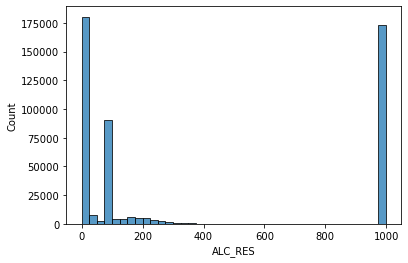

In [ ]:
# Check the distrubition of BAC values
sns.histplot(x='ALC_RES', data=df)

Could not eyeball many drunk driver with BAC >=600 from the chart above.

In [ ]:
# Groupby State & Year, to aggregate the total fatals for each states by year
fatals_pivot = df.pivot_table(index=['YEAR', 'State_abbreviation', 'BAC'], values=['FATALS','DRUNK_DR'], aggfunc={'sum','median','mean'})
fatals_pivot

DRUNK_DR                  FATALS         \
                                       mean median    sum      mean median   
YEAR State_abbreviation BAC                                                  
2011 AK                 BAC<=0.02  1.277778    1.0   23.0  1.111111    1.0   
                        BAC<=0.04  1.000000    1.0    5.0  1.000000    1.0   
                        BAC_NA     0.111111    0.0    2.0  1.277778    1.0   
                        NOT_Drunk  0.080000    0.0    4.0  1.140000    1.0   
     AL                 BAC<=0.02  1.024390    1.0  126.0  1.113821    1.0   
...                                     ...    ...    ...       ...    ...   
2020 WV                 NOT_Drunk  0.123077    0.0   16.0  1.130769    1.0   
     WY                 BAC<=0.02  1.000000    1.0   22.0  1.136364    1.0   
                        BAC<=0.04  1.000000    1.0    9.0  1.333333    1.0   
                        BAC_NA     0.126214    0.0   13.0  1.116505    1.0   
                        NOT_Drunk  0.051282    0.0    2.0  1.128205    1.0   

                                          
                                     sum  
YEAR State_abbreviation BAC               
2011 AK                 BAC<=0.02   20.0  
                        BAC<=0.04    5.0  
                        BAC_NA      23.0  
                        NOT_Drunk   57.0  
     AL                 BAC<=0.02  137.0  
...                                  ...  
2020 WV                 NOT_Drunk  147.0  
     WY                 BAC<=0.02   25.0  
                        BAC<=0.04   12.0  
                        BAC_NA     115.0  
                        NOT_Drunk   44.0  

[2279 rows x 6 columns]

In [ ]:
#convert pivot table to DataFrame
df_fatals_pivot = fatals_pivot.reset_index()

#view DataFrame
df_fatals_pivot.columns = ['YEAR', 'State_abbreviation', 'BAC_level','Mean_DDR', 'Median_DDR', 'Total_DDR','Mean','Median','Total']
df_fatals_pivot

,YEAR,State_abbreviation,BAC_level,Mean_DDR,Median_DDR,Total_DDR,Mean,Median,Total
0,2011,AK,BAC<=0.02,1.277778,1.0,23.0,1.111111,1.0,20.0
1,2011,AK,BAC<=0.04,1.000000,1.0,5.0,1.000000,1.0,5.0
2,2011,AK,BAC_NA,0.111111,0.0,2.0,1.277778,1.0,23.0
3,2011,AK,NOT_Drunk,0.080000,0.0,4.0,1.140000,1.0,57.0
4,2011,AL,BAC<=0.02,1.024390,1.0,126.0,1.113821,1.0,137.0
...,...,...,...,...,...,...,...,...,...
2274,2020,WV,NOT_Drunk,0.123077,0.0,16.0,1.130769,1.0,147.0
2275,2020,WY,BAC<=0.02,1.000000,1.0,22.0,1.136364,1.0,25.0
2276,2020,WY,BAC<=0.04,1.000000,1.0,9.0,1.333333,1.0,12.0
2277,2020,WY,BAC_NA,0.126214,0.0,13.0,1.116505,1.0,115.0


In [ ]:
#Read the previous data set for Tax rate & Population
ref_data = pd.read_excel('C:/Users/melox/Downloads/state_alcohol_rates_pop.xlsx')
ref_data

,STATE,State_full,State_abbreviation,YEAR,Distilled_spirits,Beer,Wine,Average_Tax,Population
0,1,Alabama,AL,2022,0.00,1.0500,1.7000,0.916667,4949697
1,2,Alaska,AK,2022,12.80,1.0700,2.5000,5.456667,720763
2,4,Arizona,AZ,2022,3.00,0.1600,0.8400,1.333333,7640796
3,5,Arkansas,AR,2022,2.50,0.2400,0.7500,1.163333,3042017
4,6,California,CA,2022,3.30,0.2000,0.2000,1.233333,39664128
...,...,...,...,...,...,...,...,...,...
2086,52,Virginia,VA,1982,0.00,0.2565,1.5100,0.588833,5492783
2087,53,Washington,WA,1982,0.00,0.0839,0.7665,0.283467,4276552
2088,54,West Virginia,WV,1982,0.00,0.1770,1.0000,0.392333,1949604
2089,55,Wisconsin,WI,1982,3.28,0.0645,0.2500,1.198167,4728870


In [ ]:
#add population data and calculate the fatals per capita for each year and state
df_fatals_pivot = df_fatals_pivot.merge(ref_data, how='left', on =['State_abbreviation', 'YEAR'])
df_fatals_pivot['Total_Fatals_permillion'] = df_fatals_pivot['Total']*100000/df_fatals_pivot['Population']
df_fatals_pivot['Mean_Fatals_permillion'] = df_fatals_pivot['Mean']*100000/df_fatals_pivot['Population']
df_fatals_pivot

,YEAR,State_abbreviation,BAC_level,Mean_DDR,Median_DDR,Total_DDR,Mean,Median,Total,STATE,State_full,Distilled_spirits,Beer,Wine,Average_Tax,Population,Total_Fatals_permillion,Mean_Fatals_permillion
0,2011,AK,BAC<=0.02,1.277778,1.0,23.0,1.111111,1.0,20.0,2,Alaska,12.8,1.070,2.5,5.456667,722128,2.769592,0.153866
1,2011,AK,BAC<=0.04,1.000000,1.0,5.0,1.000000,1.0,5.0,2,Alaska,12.8,1.070,2.5,5.456667,722128,0.692398,0.138480
2,2011,AK,BAC_NA,0.111111,0.0,2.0,1.277778,1.0,23.0,2,Alaska,12.8,1.070,2.5,5.456667,722128,3.185031,0.176946
3,2011,AK,NOT_Drunk,0.080000,0.0,4.0,1.140000,1.0,57.0,2,Alaska,12.8,1.070,2.5,5.456667,722128,7.893337,0.157867
4,2011,AL,BAC<=0.02,1.024390,1.0,126.0,1.113821,1.0,137.0,1,Alabama,0.0,1.050,1.7,0.916667,4799069,2.854720,0.023209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2274,2020,WV,NOT_Drunk,0.123077,0.0,16.0,1.130769,1.0,147.0,54,West Virginia,0.0,0.177,1.0,0.392333,1755715,8.372657,0.064405
2275,2020,WY,BAC<=0.02,1.000000,1.0,22.0,1.136364,1.0,25.0,56,Wyoming,0.0,0.020,0.0,0.006667,582233,4.293814,0.195173
2276,2020,WY,BAC<=0.04,1.000000,1.0,9.0,1.333333,1.0,12.0,56,Wyoming,0.0,0.020,0.0,0.006667,582233,2.061031,0.229003
2277,2020,WY,BAC_NA,0.126214,0.0,13.0,1.116505,1.0,115.0,56,Wyoming,0.0,0.020,0.0,0.006667,582233,19.751543,0.191763


In [ ]:
# drop some unwanted columns, now we have the aggregated fatals per state per year
df_fatals_pivot = df_fatals_pivot.drop(['State_abbreviation', 'STATE', 'Distilled_spirits', 'Beer', 'Wine', 'Median_DDR',
                                       'Total_DDR','Median', 'Mean', 'Total_Fatals_permillion', 'Total'], axis=1)
df_fatals_pivot.dtypes

YEAR                        int64
BAC_level                  object
Mean_DDR                  float64
State_full                 object
Average_Tax               float64
Population                  int64
Mean_Fatals_permillion    float64
dtype: object

## Quick check of the pivot table dataset

In [ ]:
df_fatals_pivot.sort_values('Mean_Fatals_permillion', ascending=False).head(20)

,YEAR,BAC_level,Mean_DDR,State_full,Average_Tax,Population,Mean_Fatals_permillion
1872,2019,BAC<=0.04,1.000000,District Of Columbia,0.630000,705749,0.283387
2055,2019,NOT_Drunk,0.136364,Wyoming,0.006667,578759,0.247395
956,2014,NOT_Drunk,0.134615,Wyoming,0.006667,582531,0.234388
1181,2015,BAC_NA,0.105769,Wyoming,0.006667,585613,0.231513
716,2013,NOT_Drunk,0.222222,Wyoming,0.006667,582122,0.229047
2276,2020,BAC<=0.04,1.000000,Wyoming,0.006667,582233,0.229003
240,2012,BAC<=0.04,1.000000,Alaska,5.456667,730443,0.228172
36,2011,BAC<=0.02,1.000000,District Of Columbia,0.630000,619800,0.225879
713,2013,BAC<=0.04,1.000000,Wyoming,0.006667,582122,0.223321
39,2011,BAC_NA,0.500000,District Of Columbia,0.630000,619800,0.221846


We can find Wyoming and District Of Columbia are the top 2 states for the top 20 list. 
Howere, there are 4 groups had drivers were not drunk for the accidents in the top 5.
Which is werid that we should expect other states have the similar apperances since they all have the same BAC limit = 0.08%.

<AxesSubplot:xlabel='Mean_Fatals_permillion', ylabel='Count'>

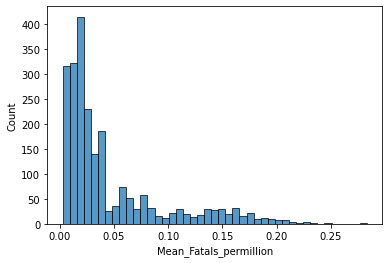

In [ ]:
sns.histplot(x='Mean_Fatals_permillion', data=df_fatals_pivot)

With a simple chart, we can tell the the mean fatals per million people is right-skewed nation wide from 2011-2020.

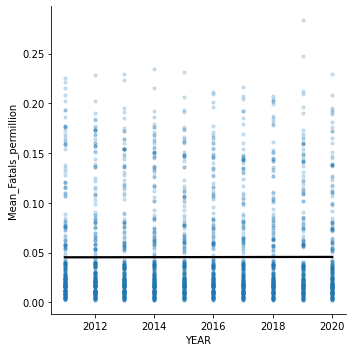

In [ ]:
# Check if the mean Mean_Fatals_permillion is highly collreated with Year

sns.lmplot(x='YEAR',y='Mean_Fatals_permillion', data=df_fatals_pivot,
          ci = None, scatter_kws={'alpha':0.2, 's': 10}, line_kws={'color':'black'})

plt.tight_layout()

It seems like year is not a huge factor here.

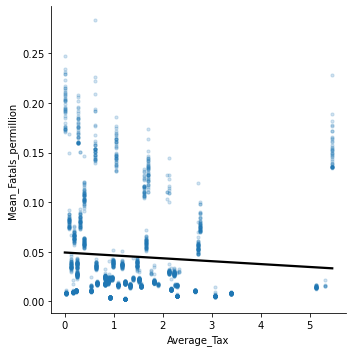

In [ ]:
# Check if the mean Mean_Fatals_permillion is highly collreated with Average_Tax

sns.lmplot(x='Average_Tax',y='Mean_Fatals_permillion', data=df_fatals_pivot,
          ci = None, scatter_kws={'alpha':0.2, 's': 10}, line_kws={'color':'black'})

plt.tight_layout()

It seems like higher tax rate could have lower the fatal rates to some extent.

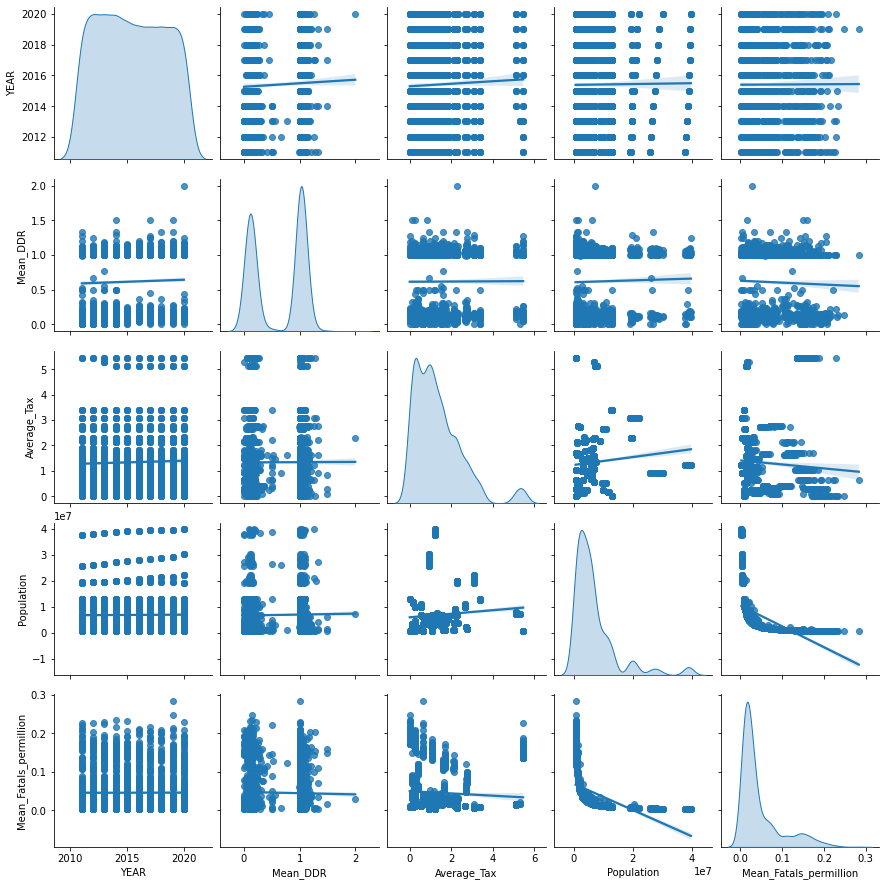

In [ ]:
sns.pairplot(df_fatals_pivot, kind="reg",diag_kind="kde")

We notice that there are some expected/acceptable trends:
1. Higher population leads to more fatals.
2. Higher Tax rate leads to fewer fatals.
3. More drunk drivers leads to more fatals.

However, some other findings:
1. Year could not provide us any valuable info.
2. Average tax rates did not raise which might be a miss.
3. Average drunk drivers has very little correlation with fatals.
4. Higher population leads to lower mean fatals per captia.

## Build a regression models for the pivot table dataset

In [ ]:
df_fatals_pivot.columns

Index(['YEAR', 'BAC_level', 'Mean_DDR', 'State_full', 'Average_Tax',
       'Population', 'Mean_Fatals_permillion'],
      dtype='object')

In [ ]:
model_pivot = ols('Mean_Fatals_permillion ~ YEAR + C(BAC_level) + Mean_DDR + C(State_full) + Average_Tax + Population', data=df_fatals_pivot)
fitted_model_pivot = model_pivot.fit()
fitted_model_pivot.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Mean_Fatals_permillion   R-squared:                       0.976
Model:                                OLS   Adj. R-squared:                  0.976
Method:                     Least Squares   F-statistic:                     1584.
Date:                    Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                            18:01:46   Log-Likelihood:                 7884.0
No. Observations:                    2279   AIC:                        -1.565e+04
Df Residuals:                        2220   BIC:                        -1.531e+04
Df Model:                              58                                         
Covariance Type:                nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 0.3126      0.128      2.444      0.015       0.062       0.563
C(BAC_level)[T.BAC<=0.04]                -0.0004      0.000     -0.801      0.423      -0.001       0.001
C(BAC_level)[T.BAC<=0.0775]              -0.0007      0.001     -1.098      0.272      -0.002       0.001
C(BAC_level)[T.BAC>0.0825]                0.0069      0.002      3.974      0.000       0.003       0.010
C(BAC_level)[T.BAC_0.08]                  0.0028      0.003      0.867      0.386      -0.004       0.009
C(BAC_level)[T.BAC_NA]                    0.0075      0.002      4.313      0.000       0.004       0.011
C(BAC_level)[T.NOT_Drunk]                 0.0097      0.002      5.288      0.000       0.006       0.013
C(State_full)[T.Alaska]                   0.1282      0.004     30.806      0.000       0.120       0.136
C(State_full)[T.Arizona]                 -0.0071      0.002     -3.493      0.000      -0.011      -0.003
C(State_full)[T.Arkansas]                 0.0132      0.002      6.717      0.000       0.009       0.017
C(State_full)[T.California]              -0.0140      0.021     -0.684      0.494      -0.054       0.026
C(State_full)[T.Colorado]                -0.0033      0.002     -2.007      0.045      -0.007   -7.61e-05
C(State_full)[T.Connecticut]              0.0061      0.002      3.189      0.001       0.002       0.010
C(State_full)[T.Delaware]                 0.0909      0.003     31.056      0.000       0.085       0.097
C(State_full)[T.District Of Columbia]     0.1396      0.003     46.407      0.000       0.134       0.145
C(State_full)[T.Florida]                 -0.0150      0.010     -1.570      0.117      -0.034       0.004
C(State_full)[T.Georgia]                 -0.0120      0.004     -3.193      0.001      -0.019      -0.005
C(State_full)[T.Hawaii]                   0.0539      0.003     18.486      0.000       0.048       0.060
C(State_full)[T.Idaho]                    0.0414      0.003     16.486      0.000       0.036       0.046
C(State_full)[T.Illinois]                -0.0135      0.005     -2.605      0.009      -0.024      -0.003
C(State_full)[T.Indiana]                 -0.0064      0.002     -3.347      0.001      -0.010      -0.003
C(State_full)[T.Iowa]                     0.0123      0.002      6.422      0.000       0.009       0.016
C(State_full)[T.Kansas]                   0.0150      0.002      7.496      0.000       0.011       0.019
C(State_full)[T.Kentucky]                 0.0011      0.002      0.666      0.506      -0.002       0.004
C(State_full)[T.Louisiana]                0.0007      0.002      0.442      0.659      -0.002       0.004
C(State_full)[T.Maine]                    0.0602      0.003     22.466 

R-squared = 0.976 is very high.
The intercept is 0.3126 per million.
BAC below 0.08 have negative coef which makes sense, however, for drivers were not drunk have the higher coef than the BAC>0.0825. (both are significant, p<=0.05)
And we can tell, some states are significant variables as well.

## Build models on all data

In [ ]:
# Now jump back to the raw data set, and adding fatal per million
df['Fatals_permillion'] = df['FATALS']*100000/df['Population']
df.head()

,VE_FORMS_acc,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY_acc,DAY_acc,MONTH_acc,YEAR,...,LOCATION,BAC,State_full,State_abbreviation,Distilled_spirits,Beer,Wine,Average_Tax,Population,Fatals_permillion
0,1,0,0,0,1,1,5,4,1,2011,...,0,BAC<=0.02,Alabama,AL,0.0,1.05,1.7,0.916667,4799069.0,0.020837
1,1,0,0,0,1,1,73,4,1,2011,...,0,BAC_NA,Alabama,AL,0.0,1.05,1.7,0.916667,4799069.0,0.020837
2,2,0,0,0,5,5,97,5,1,2011,...,0,NOT_Drunk,Alabama,AL,0.0,1.05,1.7,0.916667,4799069.0,0.041675
3,2,0,0,0,5,5,97,5,1,2011,...,0,NOT_Drunk,Alabama,AL,0.0,1.05,1.7,0.916667,4799069.0,0.041675
4,1,0,0,0,1,1,15,8,1,2011,...,0,BAC_NA,Alabama,AL,0.0,1.05,1.7,0.916667,4799069.0,0.020837


In [ ]:
df.columns

Index(['VE_FORMS_acc', 'PVH_INVL', 'PEDS', 'PERNOTMVIT', 'PERMVIT', 'PERSONS',
       'COUNTY_acc', 'DAY_acc', 'MONTH_acc', 'YEAR', 'DAY_WEEK', 'HOUR_acc',
       'MINUTE_acc', 'NHS', 'HARM_EV_acc', 'MAN_COLL_acc', 'RELJCT1',
       'RELJCT2', 'TYP_INT', 'REL_ROAD', 'WRK_ZONE', 'LGT_COND', 'WEATHER',
       'SCH_BUS_acc', 'RAIL', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR', 'ARR_MIN',
       'HOSP_HR', 'HOSP_MN', 'FATALS', 'DRUNK_DR', 'ID', 'STATE', 'ST_CASE',
       'VE_FORMS_per', 'VEH_NO', 'PER_NO', 'STR_VEH', 'COUNTY_per', 'DAY_per',
       'MONTH_per', 'HOUR_per', 'MINUTE_per', 'HARM_EV_per', 'MAN_COLL_per',
       'SCH_BUS_per', 'AGE', 'SEX', 'PER_TYP', 'INJ_SEV', 'SEAT_POS',
       'REST_USE', 'REST_MIS', 'AIR_BAG', 'EJECTION', 'EJ_PATH', 'EXTRICAT',
       'DRINKING', 'ALC_DET', 'ALC_STATUS', 'ATST_TYP', 'ALC_RES', 'DRUGS',
       'DRUG_DET', 'DSTATUS', 'HOSPITAL', 'DOA', 'DEATH_DA', 'DEATH_MO',
       'DEATH_YR', 'DEATH_HR', 'DEATH_MN', 'DEATH_TM', 'LAG_HRS', 'LAG_MINS',
       'WORK_IN

In [ ]:
# make the dataframe more compact with some columns removed
df_compact = df[['DAY_acc', 'MONTH_acc', 'YEAR', 'DAY_WEEK', 'HOUR_acc',
       'RELJCT1', 'REL_ROAD', 'WRK_ZONE', 'WEATHER','SCH_BUS_acc','NOT_HOUR', 'ARR_HOUR',
       'HOSP_HR', 'DRUNK_DR', 'ID','AGE', 'SEX', 'INJ_SEV', 'SEAT_POS',
       'REST_USE', 'AIR_BAG', 'EJECTION', 'DRINKING',  'ALC_RES', 'DRUGS',
       'DRUG_DET', 'DSTATUS', 'BAC', 'State_full',
       'State_abbreviation', 'Average_Tax', 'Population', 'Fatals_permillion']]

df_compact.shape

(490389, 33)

In [ ]:
# df_compact.to_csv('C:/Users/melox/Downloads/step3_df_compact.csv', index=False)

Now build a regression model on fatals per million captia with more variables.

In [ ]:
model_mr = ols('Fatals_permillion ~ YEAR + C(BAC) + MONTH_acc + DAY_acc + C(DAY_WEEK) + HOUR_acc + C(RELJCT1) + C(REL_ROAD) + C(WRK_ZONE) + C(WEATHER) + C(SCH_BUS_acc) + C(SEX) + AGE + DRUNK_DR+C(State_full) + Average_Tax + Population', data=df_compact)
fitted_model_mr = model_mr.fit()
fitted_model_mr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Fatals_permillion   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                 1.848e+04
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:07:37   Log-Likelihood:             1.4315e+06
No. Observations:              478915   AIC:                        -2.863e+06
Df Residuals:                  478809   BIC:                        -2.862e+06
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 0.2187      0.016     13.440      0.000       0.187       0.251
C(BAC)[T.BAC<=0.04]                      -0.0003    9.5e-05     -2.793      0.005      -0.000   -7.92e-05
C(BAC)[T.BAC<=0.0775]                 -6.761e-06      0.001     -0.012      0.991      -0.001       0.001
C(BAC)[T.BAC>0.0825]                      0.0005      0.000      2.666      0.008       0.000       0.001
C(BAC)[T.BAC_0.08]                        0.0018      0.005      0.367      0.714      -0.008       0.012
C(BAC)[T.BAC_NA]                          0.0008   7.93e-05      9.767      0.000       0.001       0.001
C(BAC)[T.NOT_Drunk]                       0.0017   8.21e-05     20.484      0.000       0.002       0.002
C(DAY_WEEK)[T.2]                         -0.0002   6.75e-05     -3.340      0.001      -0.000   -9.32e-05
C(DAY_WEEK)[T.3]                         -0.0003    6.8e-05     -5.108      0.000      -0.000      -0.000
C(DAY_WEEK)[T.4]                         -0.0002   6.74e-05     -3.654      0.000      -0.000      -0.000
C(DAY_WEEK)[T.5]                         -0.0003   6.66e-05     -3.847      0.000      -0.000      -0.000
C(DAY_WEEK)[T.6]                       2.075e-05   6.41e-05      0.324      0.746      -0.000       0.000
C(DAY_WEEK)[T.7]                       8.725e-05   6.26e-05      1.393      0.164   -3.55e-05       0.000
C(RELJCT1)[T.1]                          -0.0003   8.48e-05     -3.537      0.000      -0.000      -0.000
C(RELJCT1)[T.8]                          -0.0011      0.001     -0.976      0.329      -0.003       0.001
C(RELJCT1)[T.9]                           0.0005      0.001      0.480      0.631      -0.002       0.003
C(REL_ROAD)[T.2]                         -0.0004      0.000     -2.557      0.011      -0.001   -9.25e-05
C(REL_ROAD)[T.3]                         -0.0002      0.000     -1.727      0.084      -0.000     2.4e-05
C(REL_ROAD)[T.4]                         -0.0013   4.71e-05    -28.407      0.000      -0.001      -0.001
C(REL_ROAD)[T.5]                         -0.0012      0.000     -9.398      0.000      -0.001      -0.001
C(REL_ROAD)[T.6]                         -0.0018      0.000     -6.500      0.000      -0.002      -0.001
C(REL_ROAD)[T.7]                         -0.0009      0.000     -2.217      0.027      -0.002      -0.000
C(REL_ROAD)[T.8]                         -0.0006      0.000     -1.999      0.046      -0.001    -1.2e-05
C(REL_ROAD)[T.10]                        -0.0007      0.000     -1.697      0.090      -0.001       0.000
C(REL_ROAD)[T.11]                        -0.0009      0.001     -1.451      0.147      -0.002       0.000
C(REL_ROAD)[T.12]                         0.0013      0.001      1.068      0.286      -0.001       0.004
C(REL_ROA

R-squared:	0.802 is very high.


In [ ]:
# Pull out all the coef
results = pd.read_html(fitted_model_mr.summary().tables[1].as_html(),header=0,index_col=0)[0]
results = pd.DataFrame(results)
results.columns =['Coef', 'Std_err', 't', 'P', 'L0.025', 'U0.975']

In [ ]:
# Check those confident coef
results.sort_values('P').head(60)

,Coef,Std_err,t,P,L0.025,U0.975
Intercept,0.218700,0.016000,13.440,0.0,0.187,0.251000
C(State_full)[T.Missouri],-0.005100,0.000000,-30.930,0.0,-0.005,-0.005000
C(State_full)[T.Mississippi],0.015700,0.000000,79.139,0.0,0.015,0.016000
C(State_full)[T.Minnesota],-0.003000,0.000000,-13.903,0.0,-0.003,-0.003000
C(State_full)[T.Michigan],-0.012500,0.000000,-48.738,0.0,-0.013,-0.012000
C(State_full)[T.Massachusetts],-0.007300,0.000000,-31.594,0.0,-0.008,-0.007000
C(State_full)[T.Maryland],-0.004800,0.000000,-25.944,0.0,-0.005,-0.004000
C(State_full)[T.Maine],0.059400,0.000000,177.543,0.0,0.059,0.060000
C(State_full)[T.Kentucky],0.001900,0.000000,11.613,0.0,0.002,0.002000
C(State_full)[T.Kansas],0.016300,0.000000,74.975,0.0,0.016,0.017000


Checking all significant variables:

We found lots of states are listed as confident variables, so that means the nation wide BAC standard is not really working.
The states should have their own BAC limits for better results, which is fewer fatals per (million) capita.

After states, we found DRUNK_DR which is the total number of drunk drivers involved. For sure, this is critial.

Then, we found YEAR has negative coef, which is good, we are having fewer fatals, the reasons could be better technology of cars, higher educational background of individuals, more tools to remind and warn drivers out there, etc.

In [ ]:
results.head(7)

,Coef,Std_err,t,P,L0.025,U0.975
Intercept,0.218700,0.016000,13.440,0.000,0.187,0.251000
C(BAC)[T.BAC<=0.04],-0.000300,0.000095,-2.793,0.005,-0.000,-0.000079
C(BAC)[T.BAC<=0.0775],-0.000007,0.001000,-0.012,0.991,-0.001,0.001000
C(BAC)[T.BAC>0.0825],0.000500,0.000000,2.666,0.008,0.000,0.001000
C(BAC)[T.BAC_0.08],0.001800,0.005000,0.367,0.714,-0.008,0.012000
C(BAC)[T.BAC_NA],0.000800,0.000079,9.767,0.000,0.001,0.001000
C(BAC)[T.NOT_Drunk],0.001700,0.000082,20.484,0.000,0.002,0.002000


We ound only BAC<=0.04, BAC>0.0825, BAC_NA & Not_Drunk are significant. (p<=0.05)
However, BAC_NA & NOT_Drunk both have positive impact to the fatal rate. NOT_Drunk has the highest coef amoung the significant ones above.
So, the national BAC limit of 0.08% is not really effective. States should have their own limits set.